In [1]:
import json
import os

# Define input and output directories
input_dir = "../answer_relevancy_qualitative_2"
output_dir = "../answer_relevancy_qualitative_output_2"

# Get all JSON files from input directory
input_files = [f for f in os.listdir(input_dir) if f.endswith('.json')]

# Process each input file
for input_file in input_files:
    # Read input file
    with open(os.path.join(input_dir, input_file), 'r') as f:
        input_data = json.load(f)
    
    # Read existing output file
    output_file = f"verbose_AR_{input_file}"
    with open(os.path.join(output_dir, output_file), 'r') as f:
        output_data = json.load(f)
    
    # Add response to each item in output data
    for i, item in enumerate(output_data):
        if i < len(input_data):
            item['response'] = input_data[i].get('response', '')
    
    # Write updated data back to output file
    with open(os.path.join(output_dir, output_file), 'w') as f:
        json.dump(output_data, f, indent=4)

print("Processing complete!")


Processing complete!


In [3]:
import json
import os

# Define input and output directories
input_dir = "../answer_relevancy_qualitative_output_2"

# Get all JSON files from input directory
input_files = [f for f in os.listdir(input_dir) if f.endswith('.json')]

# Process each input file
for input_file in input_files:
    # Read input file
    with open(os.path.join(input_dir, input_file), 'r') as f:
        data = json.load(f)
    
    # Reorder the items to put response after user_input
    reordered_data = []
    for item in data:
        reordered_item = {
            'user_input': item['user_input'],
            'response': item['response'],
            'generated_questions': item['generated_questions'],
            'cosine_sim': item['cosine_sim'],
            'cosine_sim_mean': item['cosine_sim_mean'],
            'final_score': item['final_score']
        }
        reordered_data.append(reordered_item)
    
    # Write reordered data back to file
    with open(os.path.join(input_dir, input_file), 'w') as f:
        json.dump(reordered_data, f, indent=4)

print("Reordering complete!")


Reordering complete!


In [5]:
import json
import os

# Define input directory
input_dir = "../answer_relevancy_qualitative_output_2"

# Get all JSON files from input directory
input_files = [f for f in os.listdir(input_dir) if f.endswith('.json')]

# Process each input file
for input_file in input_files:
    # Read input file
    with open(os.path.join(input_dir, input_file), 'r') as f:
        data = json.load(f)
    
    # Add index to each item
    indexed_data = []
    for idx, item in enumerate(data):
        indexed_item = {
            'index': idx,
            'user_input': item['user_input'],
            'response': item['response'],
            'generated_questions': item['generated_questions'],
            'cosine_sim': item['cosine_sim'],
            'cosine_sim_mean': item['cosine_sim_mean'],
            'final_score': item['final_score']
        }
        indexed_data.append(indexed_item)
    
    # Write indexed data back to file
    with open(os.path.join(input_dir, input_file), 'w') as f:
        json.dump(indexed_data, f, indent=4)

print("Indexing complete!")


Indexing complete!


In [6]:
import json

# Read K5 and K10 files
with open(os.path.join(input_dir, 'verbose_AR_baseline_gpt4omini_k5.json'), 'r') as f:
    k5_data = json.load(f)

with open(os.path.join(input_dir, 'verbose_AR_baseline_gpt4omini_k10.json'), 'r') as f:
    k10_data = json.load(f)

# Find elements in K5 with final_score = 0
zero_score_k5 = [item for item in k5_data if item['final_score'] == 0]

print("Elements with final_score = 0 in K5 and their corresponding elements in K10:")
print("-" * 100)

for item in zero_score_k5:
    idx = item['index']
    k10_item = k10_data[idx]
    
    print(f"\nIndex: {idx}")
    print(f"K5 Final Score: {item['final_score']}")
    print(f"K10 Final Score: {k10_item['final_score']}")
    print("\nK5 Response:")
    print(item['response'])
    print("\nK10 Response:")
    print(k10_item['response'])
    print("\nK5 Generated Questions:")
    print(item['generated_questions'])
    print("\nK10 Generated Questions:")
    print(k10_item['generated_questions'])
    print("-" * 100)


Elements with final_score = 0 in K5 and their corresponding elements in K10:
----------------------------------------------------------------------------------------------------

Index: 5
K5 Final Score: 0.0
K10 Final Score: 0.8868723207356214

K5 Response:
The provided context does not specify whether the Receiving Party must notify the Disclosing Party if required by law, regulation, or judicial process to disclose any Confidential Information. Therefore, I don't know the answer to that question.

K10 Response:
Yes, the document requires the Receiving Party (Mentor) to notify the Disclosing Party (Organiser) if they are required by law, regulation, or judicial process to disclose any Confidential Information. Mentor must promptly inform Organiser and allow reasonable time to oppose such disclosure. However, the disclosure must be limited to the minimum extent necessary to comply with the order.

K5 Generated Questions:
['Does the Receiving Party need to notify the Disclosing Party if

In [8]:
import json
import os

# Define input directories
baseline_dir = '../answer_relevancy_qualitative_output_2'
prompttune_dir = '../answer_relevancy_qualitative_output'

# Read baseline and prompttune K10 files
with open(os.path.join(baseline_dir, 'verbose_AR_baseline_gpt4omini_k10.json'), 'r') as f:
    baseline_data = json.load(f)

with open(os.path.join(prompttune_dir, 'verbose_AR_prompttune_gpt4omini_k10.json'), 'r') as f:
    prompttune_data = json.load(f)

# Find elements in prompttune with final_score = 0
zero_score_prompttune = [item for item in prompttune_data if item['final_score'] == 0]

print("Elements with final_score = 0 in prompttune and their corresponding elements in baseline:")
print("-" * 100)

for item in zero_score_prompttune:
    idx = item['index']
    baseline_item = baseline_data[idx]
    
    print(f"\nIndex: {idx}")
    print(f"Prompttune Final Score: {item['final_score']}")
    print(f"Baseline Final Score: {baseline_item['final_score']}")
    print("\nPrompttune Response:")
    print(item['response'])
    print("\nBaseline Response:")
    print(baseline_item['response'])
    print("\nPrompttune Generated Questions:")
    print(item['generated_questions'])
    print("\nBaseline Generated Questions:")
    print(baseline_item['generated_questions'])
    print("-" * 100)


Elements with final_score = 0 in prompttune and their corresponding elements in baseline:
----------------------------------------------------------------------------------------------------

Index: 6
Prompttune Final Score: 0.0
Baseline Final Score: 0.0

Prompttune Response:
The Non-Disclosure Agreement (NDA) does not explicitly allow the Receiving Party (Mentor) to acquire information similar to the Confidential Information from a third party. However, it does state that Confidential Information does not include "information received from a third party who was free to disclose such information." This implies that if the third party is legally permitted to disclose the information, the Mentor can acquire it without violating the NDA.

In summary, while the NDA does not prohibit the Mentor from obtaining similar information from a third party, it is contingent upon that third party being free to disclose such information. If the third party is not authorized to disclose the information

interesting point for qualitative analysis:


index 120: prompttune share lengthy explanation of strict clauses regarding sharing confidential info, baseline straightforwardly answer that it is not allowed without auth (similar answer but different style of exposition, baseline is more straightforward and confidence of its answer)  
index 155: both state vague answer (not explicityly blablabla) but baseline does not considered to be non-commital  
index 180  
index 181  

analysis conclusion: prompt tune does not jump the gun and arrive in its own statement without a very explicit mention of the thing in the clause, while the baseline is jump into the conclusion, both are somewhat valid response but prompt tune gives a more contextual answer (explaining the context) and taking a careful stance which useful in legal situation

In [9]:
import matplotlib.pyplot as plt


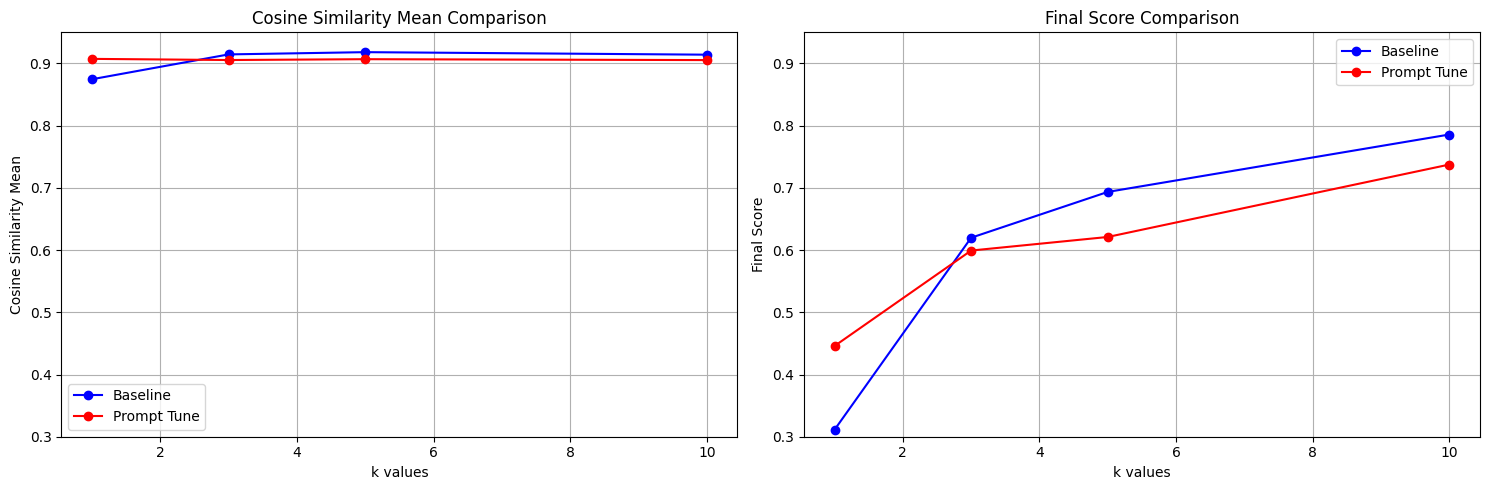

In [13]:
# Read evaluation files
with open(os.path.join(baseline_dir, 'answer_relevancy_verbose_eval.json'), 'r') as f:
    baseline_eval = json.load(f)

with open(os.path.join(prompttune_dir, 'answer_relevancy_verbose_eval.json'), 'r') as f:
    prompttune_eval = json.load(f)

# Extract data for plotting
k_values = [1, 3, 5, 10]
baseline_cosine = [item['cosine_sim_mean_avg'] for item in baseline_eval]
baseline_final = [item['final_score_avg'] for item in baseline_eval]
prompttune_cosine = [item['cosine_sim_mean_avg'] for item in prompttune_eval]
prompttune_final = [item['final_score_avg'] for item in prompttune_eval]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot cosine similarity means
ax1.plot(k_values, baseline_cosine, 'b-o', label='Baseline')
ax1.plot(k_values, prompttune_cosine, 'r-o', label='Prompt Tune')
ax1.set_xlabel('k values')
ax1.set_ylabel('Cosine Similarity Mean')
ax1.set_title('Cosine Similarity Mean Comparison')
ax1.set_ylim(0.3, 0.95)  # Set similar y-axis range
ax1.legend()
ax1.grid(True)

# Plot final scores
ax2.plot(k_values, baseline_final, 'b-o', label='Baseline')
ax2.plot(k_values, prompttune_final, 'r-o', label='Prompt Tune')
ax2.set_xlabel('k values')
ax2.set_ylabel('Final Score')
ax2.set_title('Final Score Comparison')
ax2.set_ylim(0.3, 0.95)  # Set similar y-axis range
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()
